In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
#import plotly as py
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
data = pd.read_csv('spotify.csv')
data.head()
#data.tail()

,title,artist,top_genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,like
0,We R Who We R,Kesha,dance pop,2010,120,82,74,-5,12,65,205,1,4,71,1
1,Chasing The Sun,The Wanted,boy band,2012,128,73,64,-6,50,68,199,24,10,64,1
2,Geri Dön,Sezen Aksu,turkish pop,1984,136,49,42,-7,28,32,259,77,4,52,0
3,Just Dance,Lady Gaga,dance pop,2008,119,74,82,-5,18,75,242,3,3,73,1
4,Tutamıyorum Zamanı,Kenan Doğulu,turkish pop,2001,145,64,70,-9,8,79,238,20,3,55,1


In [12]:
#X = data.iloc[0:1]
#X
x = data["bpm"].values
y = data["val"].values

x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)

regr = linear_model.LinearRegression()
regr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

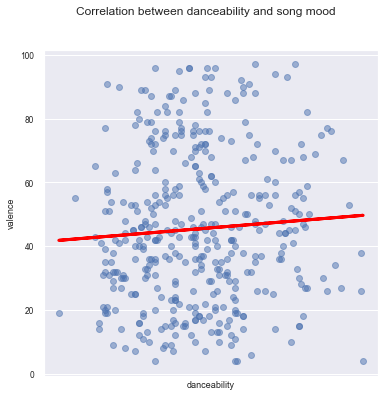

In [16]:
fig = plt.figure(figsize=(6, 6))
fig.suptitle("Correlation between danceability and song mood")

ax = plt.subplot(1, 1, 1)
ax.scatter(x, y, alpha=0.5)
ax.plot(x, regr.predict(x), color="red", linewidth=3)
plt.xticks(())
plt.xlabel("danceability")
plt.ylabel("valence")

plt.show()

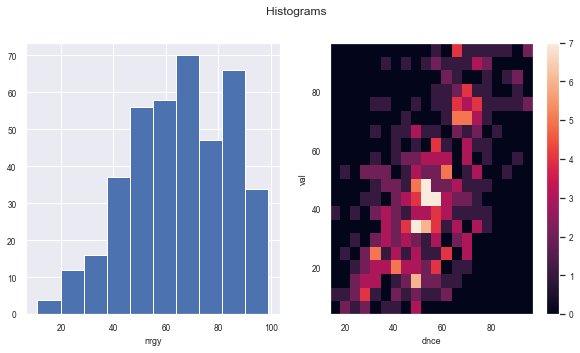

In [17]:
x = "dnce"
y = "val"

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, sharex=False, figsize=(10, 5))
fig.suptitle("Histograms")
h = ax2.hist2d(data[x], data[y], bins=20)
ax1.hist(data["nrgy"])

ax2.set_xlabel(x)
ax2.set_ylabel(y)

ax1.set_xlabel("nrgy")

plt.colorbar(h[3], ax=ax2)

plt.show()

In [18]:
#pip install C:\Users\Downloads\plotly-3.5.0-py2.py3-none-any.whl



In [19]:
chosen = ["nrgy", "live", "bpm", "val", "dB", "spch", "acous", "dnce", "dur"]
text1 = data["artist"] + " - " + data["title"]
text2 = text1.values

# X = data_frame.drop(droppable, axis=1).values
X = data[chosen].values
y = data["dnce"].values

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

pca = PCA(n_components=3)
pca.fit(X)

X = pca.transform(X)

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

trace = go.Scatter3d(
    x=X[:,0],
    y=X[:,1],
    z=X[:,2],
    text=text2,
    mode="markers",
    marker=dict(
        size=8,
        color=y
    )
)

fig = go.Figure(data=[trace])
py.iplot(fig, filename="test-graph")

In [20]:
chosen = ["nrgy", "live", "bpm", "val"]
text1 = data["artist"] + " - " + data["title"]
text2 = text1.values

# X = data_frame.drop(droppable, axis=1).values
X = data[chosen].values
y = data["dB"].values

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

pca = PCA(n_components=2)
pca.fit(X)

X = pca.transform(X)

fig = {
    "data": [
        {
            "x": X[:, 0],
            "y": X[:, 1],
            "text": text2,
            "mode": "markers",
            "marker": {"size": 10, "color": y}
        }
    ],
    "layout": {
        "xaxis": {"title": "How hard is this to dance to?"},
        "yaxis": {"title": "How metal is this?"}
    }
}

py.iplot(fig, filename="test-graph2")

In [21]:
import time

chosen = ["nrgy", "live", "bpm", "val", "dB", "spch", "acous", "dnce", "dur"]

X = data[chosen].values
y = data["dB"].values

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

fig = {
    "data": [
        {
            "x": tsne_results[:, 0],
            "y": tsne_results[:, 1],
            "text": text2,
            "mode": "markers",
            "marker": {"size": 8, "color": y}
        }
    ],
    "layout": {
        "xaxis": {"title": "x-tsne"},
        "yaxis": {"title": "y-tsne"}
    }
}

py.iplot(fig, filename="test-graph2")

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.000s...
[t-SNE] Computed neighbors for 400 samples in 0.011s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 0.223952
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.548931
[t-SNE] KL divergence after 300 iterations: 0.814982
t-SNE done! Time elapsed: 0.7875325679779053 seconds


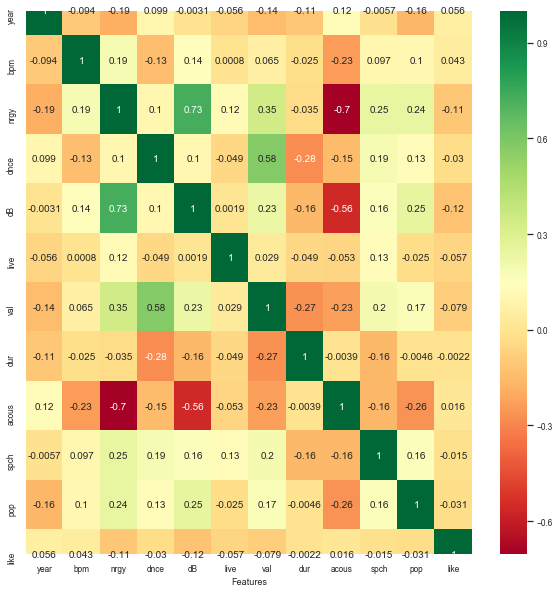

In [167]:
import seaborn as sns
f,ax = plt.subplots(figsize = (10,10)) #the size of the heat map
sns.heatmap(data.corr(), annot = True, fmt = '.2g', cmap = 'RdYlGn', ax= ax) #annot: values, fmt: decimal points of values
sns.set(font_scale = 0.75) #the font size of the value in the heat map
plt.xlabel('Features')
plt.show()

In [26]:
from sklearn.preprocessing import StandardScaler 
  
scaler = StandardScaler() 
  
scaler.fit(data.drop('like', axis = 1)) 
scaled_features = scaler.transform(data.drop('like', axis = 1)) 
  
df_feat = pd.DataFrame(scaled_features, columns = data.columns[:-1]) 
df_feat.head() 

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,0.198461,-0.051025,0.898850,1.235893,0.736206,-0.439506,0.829405,-0.756936,-0.877003,-0.376577,0.787737
1,0.395935,0.217529,0.429068,0.607260,0.400039,2.617924,0.956517,-0.862310,-0.066513,0.698078,0.287359
2,-2.368698,0.486084,-0.823685,-0.775733,0.063872,0.847833,-0.568826,0.191429,1.801138,-0.376577,-0.570430
3,0.000987,-0.084595,0.481266,1.738800,0.736206,0.043247,1.253111,-0.107130,-0.806526,-0.555686,0.930702
4,-0.690171,0.788208,-0.040714,0.984440,-0.608463,-0.761340,1.422594,-0.177379,-0.207468,-0.555686,-0.355983


In [22]:
data = data.drop(['title','artist','top_genre'], axis = 1)

from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.neighbors import KNeighborsClassifier #KNN

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
#1. Create the X_train without the like class label & Y_train (like)

X_train = data.drop('like', axis = 1)
Y_train = data['like']

#2. Split the X_Train & Y_train into training set & testing set by train_test_split function
x_train,x_test,y_train,y_test = train_test_split(X_train,Y_train,test_size = 0.2, random_state = 0)
print('the dimension of the x_train: ', x_train.shape)
print('the dimension of the x_test: ', x_test.shape)
#3. Fit the model into the training set
#Logistic Regression
log = LogisticRegression()
log.fit(x_train,y_train)
log_y_pred = log.predict(x_test)
log_result_train = round(log.score(x_train,y_train)*100,2)
#Decision Tree
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
DT_y_pred = DT.predict(x_test)
DT_result_train = round(DT.score(x_train,y_train)*100, 2)

KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train)
KNN_y_pred = KNN.predict(x_test)
KNN_result_train = round(KNN.score(x_train,y_train)*100,2)
print('Logistic Regression: ', log_result_train)
print('Decision Tree Classifier: ', DT_result_train)
print('K-NN: ', KNN_result_train)



the dimension of the x_train:  (320, 11)
the dimension of the x_test:  (80, 11)
Logistic Regression:  62.5
Decision Tree Classifier:  100.0
K-NN:  69.69


In [23]:
#4. Fit the model into the testing dataset
log_result_test = round(log.score(x_test,y_test)*100,2)
DT_result_test = round(DT.score(x_test,y_test)*100,2)
KNN_result_test = round(KNN.score(x_test,y_test)*100,2)
print('Logistic Regression: {}'.format(log_result_test))

print('Decision Tree: {}'.format(DT_result_test))
print('K-NN: {}'.format(KNN_result_test))

Logistic Regression: 47.5
Decision Tree: 51.25
K-NN: 40.0


In [24]:
#5. Apply K-fold Cross Validation method into the model (testing data)

#1. Logistic Regression
Kfold = KFold(n_splits = 10)
logregScore = cross_val_score(log,x_test,y_test, cv = Kfold)
avglogregScore = np.mean(logregScore)
#2. Decision Tree Classifier
DTScore = cross_val_score(DT, x_test,y_test, cv =Kfold)
avgDTScore = np.mean(DTScore)

#3. K-NN
KNNScore = cross_val_score(KNN, x_test,y_test, cv = Kfold)
avgKNNScore = np.mean(KNNScore)

    
print(' Logistic Regression: ', round(avglogregScore*100,2))
print(' Decision Tree Classifier: ', round(avgDTScore*100,2))
print(' K-NN: ', round(avgKNNScore*100,2))

 Logistic Regression:  61.25
 Decision Tree Classifier:  53.75
 K-NN:  43.75


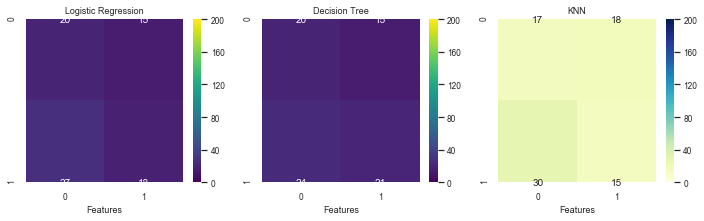

In [25]:
#6. Create the confusion matrix table for the performance of model

f, (ax1,ax3,ax4) = plt.subplots(1,3,figsize = (12,3))
#1. Logistic Regression
LogregCM = confusion_matrix(y_test,log_y_pred)
sns.heatmap(LogregCM, annot = True, fmt = 'd', vmin = 0, vmax = 200,cmap = 'viridis', ax = ax1)
#Annot: the value of the heatmap
#fmt: the decimal point of value of heatmap
#vmin, vmax: the limits of the colorbar
ax1.set_title('Logistic Regression')
ax1.set_xlabel('Features')

#2. Decision Tree
DTCM = confusion_matrix(y_test, DT_y_pred)
sns.heatmap(DTCM, annot = True, fmt = 'd', vmin = 0, vmax = 200, cmap = 'viridis', ax = ax3)
ax3.set_title('Decision Tree')
ax3.set_xlabel('Features')


#3. KNN
KNNCM = confusion_matrix(y_test, KNN_y_pred)
sns.heatmap(KNNCM, annot = True, fmt = 'd', vmin = 0 , vmax = 200, cmap = 'YlGnBu', ax = ax4)
ax4.set_title('KNN')
ax4.set_xlabel('Features')


plt.show()

In [27]:
from sklearn.metrics import classification_report
print(confusion_matrix(y_test, KNN_y_pred)) 
  
print(classification_report(y_test, KNN_y_pred)) 
print(confusion_matrix(y_test, log_y_pred)) 
  
print(classification_report(y_test, log_y_pred))

[[17 18]
 [30 15]]
              precision    recall  f1-score   support

           0       0.36      0.49      0.41        35
           1       0.45      0.33      0.38        45

    accuracy                           0.40        80
   macro avg       0.41      0.41      0.40        80
weighted avg       0.41      0.40      0.40        80

[[20 15]
 [27 18]]
              precision    recall  f1-score   support

           0       0.43      0.57      0.49        35
           1       0.55      0.40      0.46        45

    accuracy                           0.48        80
   macro avg       0.49      0.49      0.47        80
weighted avg       0.49      0.47      0.47        80



In [ ]:
title=input("song's name: ")

artist= input("artist:")

genre= input("top genre:")

year=input("year:")

bmp= input("bmp:")

nrgy= input("nrgy:")

dnce=input("dnce:")

db= input("dB:")

live= input("live:")

val=input("val:")

dur=input("dur:")

acous=input("acous:")

spch=input("spch:")

pop=input("pop:")


import csv
with open('spotify.csv', 'a',errors='ignore') as file:
    writer = csv.writer(file)
    
    writer.writerow([title,artist,genre,year,bmp,nrgy,dnce,db,live,val,dur,acous,spch,pop])
    
    
    import csv
with open('spotify.csv', 'r',errors='ignore') as file:
    reader = csv.reader(file)
    for row in reader:
        print(row)


In [ ]:
import math 


X= data.iloc[:401,4:14].values
y=data.iloc[401:,4:14].values

def KNN2(X,y,u,k=5):
    distances=np.array([math.dist(X[i]-u) for i in range(X.shape[0])])
    indices=distances.argsort()
    smallest_indices= indices[:k]
    similars= y[smallest_indices]
    if np.mean(similars)> 0.5:
        return "liked"
    else:
        return "disliked"
    
    KNN2(X,y,u=X[0],k=5)
    
    

    
    